# Makemore Bigram
## Exploration of mythical creature names

In [134]:
words = open('mythical.txt','r').read().splitlines()

In [135]:
words[:10]

['frostwyrm',
 'emberdrake',
 'thundergriffin',
 'shadowfenrir',
 'luminara serpent',
 'crystalbeast',
 'nebula phoenix',
 'specterwolf',
 'stormraven',
 'drakonguard']

In [136]:
len(words)


397

In [137]:
min(len(w) for w in words)

8

In [138]:
max(len(w) for w in words)

20

In [139]:
#tuple to map characters and their proceeding character and record counts of appearences
b={}

for w in words:
    chs =  ['<S>'] + list(w) + ['<E>']
    for ch1,ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        #Add 1 to count for appearence of tuple. If tuple not inside, return 0 + 1
        b[bigram] = b.get(bigram, 0) + 1
        #print(ch1,ch2)

b

{('<S>', 'f'): 40,
 ('f', 'r'): 20,
 ('r', 'o'): 20,
 ('o', 's'): 20,
 ('s', 't'): 88,
 ('t', 'w'): 1,
 ('w', 'y'): 1,
 ('y', 'r'): 1,
 ('r', 'm'): 33,
 ('m', '<E>'): 1,
 ('<S>', 'e'): 39,
 ('e', 'm'): 20,
 ('m', 'b'): 20,
 ('b', 'e'): 28,
 ('e', 'r'): 157,
 ('r', 'd'): 27,
 ('d', 'r'): 55,
 ('r', 'a'): 154,
 ('a', 'k'): 29,
 ('k', 'e'): 9,
 ('e', '<E>'): 10,
 ('<S>', 't'): 39,
 ('t', 'h'): 65,
 ('h', 'u'): 20,
 ('u', 'n'): 20,
 ('n', 'd'): 27,
 ('d', 'e'): 40,
 ('r', 'g'): 14,
 ('g', 'r'): 46,
 ('r', 'i'): 60,
 ('i', 'f'): 33,
 ('f', 'f'): 33,
 ('f', 'i'): 27,
 ('i', 'n'): 93,
 ('n', '<E>'): 85,
 ('<S>', 's'): 80,
 ('s', 'h'): 40,
 ('h', 'a'): 78,
 ('a', 'd'): 40,
 ('d', 'o'): 20,
 ('o', 'w'): 20,
 ('w', 'f'): 1,
 ('f', 'e'): 27,
 ('e', 'n'): 93,
 ('n', 'r'): 27,
 ('i', 'r'): 27,
 ('r', '<E>'): 53,
 ('<S>', 'l'): 20,
 ('l', 'u'): 20,
 ('u', 'm'): 20,
 ('m', 'i'): 46,
 ('n', 'a'): 20,
 ('a', 'r'): 47,
 ('a', ' '): 21,
 (' ', 's'): 2,
 ('s', 'e'): 45,
 ('r', 'p'): 26,
 ('p', 'e'): 46,
 

In [140]:
#sort by second element which is the count #add - for descending
sorted(b.items(), key = lambda keyValue: -keyValue[1])

[(('e', 'r'), 157),
 (('r', 'a'), 154),
 (('i', 'n'), 93),
 (('e', 'n'), 93),
 (('s', 't'), 88),
 (('n', '<E>'), 85),
 (('<S>', 's'), 80),
 (('h', 'a'), 78),
 (('t', 'h'), 65),
 (('p', 'h'), 65),
 (('l', 'i'), 65),
 (('r', 'i'), 60),
 (('a', 'l'), 59),
 (('m', 'e'), 59),
 (('d', 'r'), 55),
 (('a', 's'), 54),
 (('r', '<E>'), 53),
 (('a', 'r'), 47),
 (('g', 'r'), 46),
 (('m', 'i'), 46),
 (('p', 'e'), 46),
 (('t', 'a'), 46),
 (('n', 'i'), 46),
 (('x', '<E>'), 46),
 (('s', 'i'), 46),
 (('i', 'l'), 46),
 (('s', 'e'), 45),
 (('h', 'o'), 45),
 (('o', 'n'), 45),
 (('a', '<E>'), 45),
 (('k', '<E>'), 45),
 (('<S>', 'f'), 40),
 (('d', 'e'), 40),
 (('s', 'h'), 40),
 (('a', 'd'), 40),
 (('<S>', 'n'), 40),
 (('l', 'a'), 40),
 (('s', 'p'), 40),
 (('t', 'e'), 40),
 (('o', 'r'), 40),
 (('l', 'v'), 40),
 (('<S>', 'e'), 39),
 (('<S>', 't'), 39),
 (('r', 'y'), 39),
 (('e', 'c'), 39),
 (('h', 'i'), 39),
 (('i', 'm'), 39),
 (('<S>', 'v'), 39),
 (('v', 'o'), 39),
 (('a', 'n'), 39),
 (('i', 'd'), 38),
 (('t',

In [141]:
import torch

In [142]:
#Creating array
N = torch.zeros((26,26), dtype=torch.int32)

### Mapping

In [143]:
#Changing strings to be indexed from characters to integers
#join concatenates all strings into a massive string
chars = sorted(list(set(''.join(words))))

#maps char to int
stoi = { s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
stoi

{' ': 1,
 'a': 2,
 'b': 3,
 'c': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'h': 9,
 'i': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 '.': 0}

In [144]:
# i to s
itos = {i:s for s,i in stoi.items()}

itos

{1: ' ',
 2: 'a',
 3: 'b',
 4: 'c',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'h',
 10: 'i',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 0: '.'}

In [145]:
for w in words:
    chs =  ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs, chs[1:]):
        #Find char's corresponding int 
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] +=1

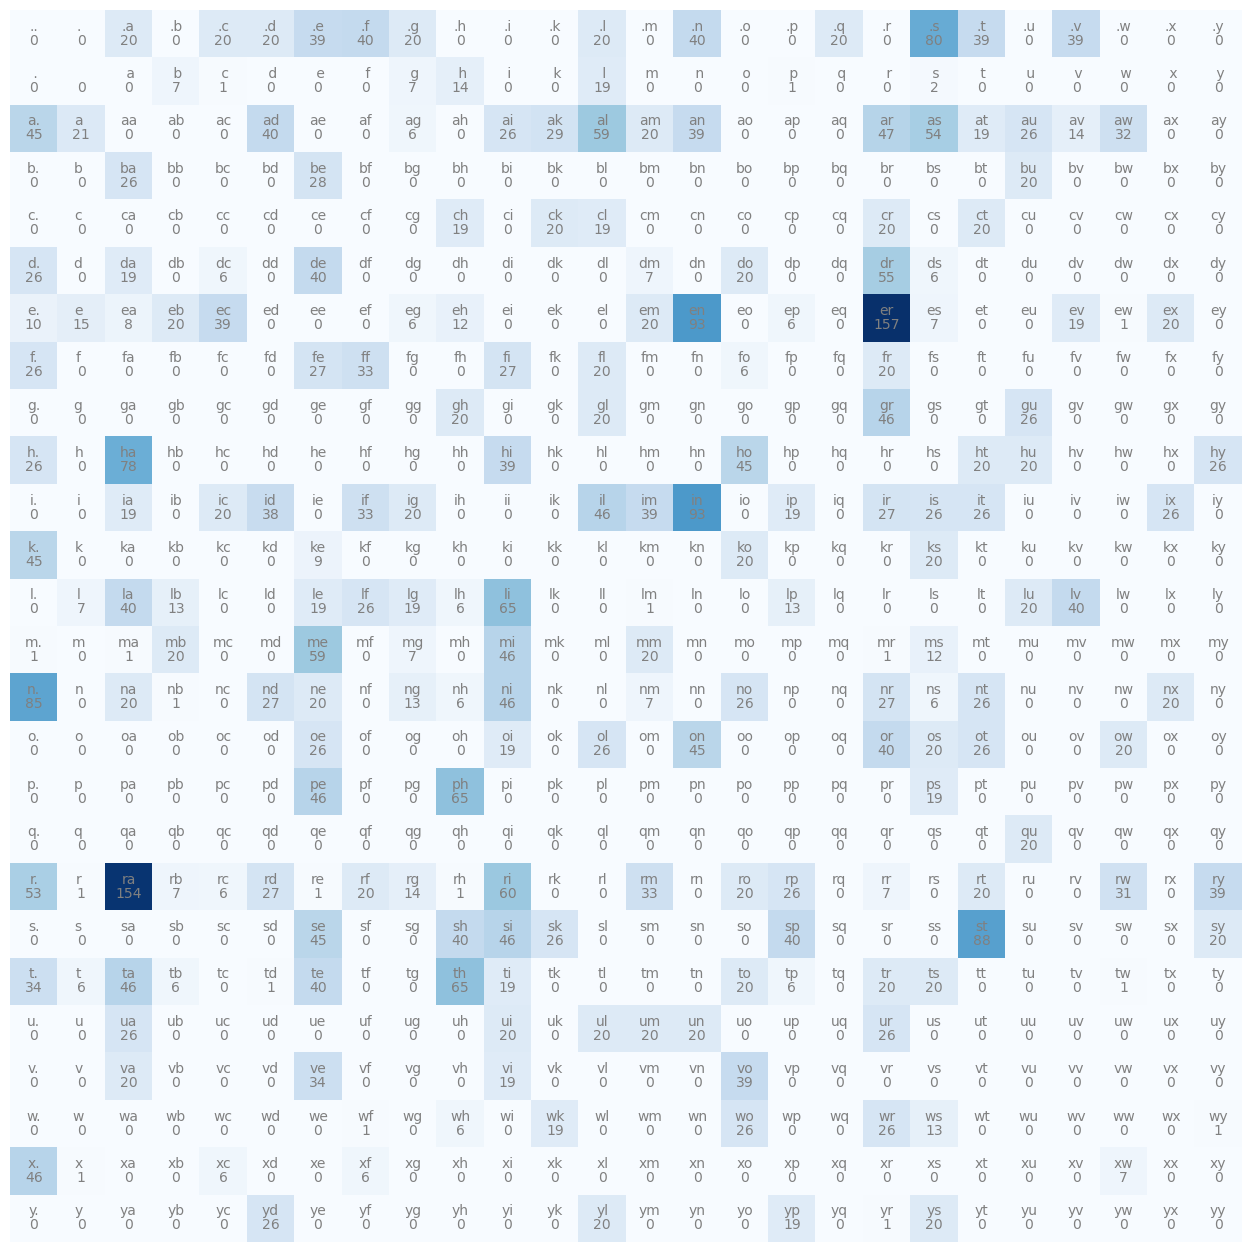

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

#OpenMP library to relax its default behavior and tolerate multiple instances. 
#This resolves the conflict between PyTorch and Matplotlib,
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')

for i in range(26):
    for j in range(26):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### Finding probabilities

In [147]:
#0th row, and all columns
N[0, :]
# or N[0] works fine too

tensor([ 0,  0, 20,  0, 20, 20, 39, 40, 20,  0,  0,  0, 20,  0, 40,  0,  0, 20,
         0, 80, 39,  0, 39,  0,  0,  0], dtype=torch.int32)

In [148]:
p = N[0].float()
p = p / p.sum() #Normalizing probabilities so they sum to 1
p

tensor([0.0000, 0.0000, 0.0504, 0.0000, 0.0504, 0.0504, 0.0982, 0.1008, 0.0504,
        0.0000, 0.0000, 0.0000, 0.0504, 0.0000, 0.1008, 0.0000, 0.0000, 0.0504,
        0.0000, 0.2015, 0.0982, 0.0000, 0.0982, 0.0000, 0.0000, 0.0000])

### Using Torch.multinomial

In [149]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item()
itos[ix]

'v'

#### Example of torch.multinomial ------------

In [150]:
#Give them a probability distribution and they will sample.
#Create generator object 3, pass g to rand function
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [151]:
# ^^^ 60% for 0, 30% for 1, 9% for 2
torch.multinomial(p, num_samples=100, replacement=True, generator = g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

#### End of Example ---------------

### Preparing Normalized Probabilities

In [152]:
# https://pytorch.org/docs/stable/generated/torch.sum.html
# Broadcasting semantics : whether 2 arrays can be combined in a binary operation
# P.sum(1, keepdim=True).shape
# 26, 26
# 26 , 1 
#Broadcastable!
P = (N+1).float()
P /= P.sum(1, keepdim=True)
P[0].sum() #Check if it has been normalized

tensor(1.0000)

We added +1 in (N+1) to avoid infinite nll later when creating a loss function. This is also called Model Smoothing.

The more we add the more smooth of a distribution. The less we add the more peaked.

In [153]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0 #index 0 is start token .
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator = g).item()
        out.append(itos[ix])
        if ix == 0: #index 0 is end token .
            break
    print(''.join(out))

venict.
thypshoipereryphinin.
sharwtolben.
erad.
volfipsthinalgva becackhorwhathisitsha yl eralenrmimigherd.
crimbentstengriter.
ghoilvadarberain.
awrwoifmehamenerawon.
ssnghilhuoespsglckosementhohaur.
fehulitasthitrasth.


#### Creating a loss function 

##### To help determine quality of our model

In [154]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)(We will be changing the numbers in table for tuning)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [155]:
log_likelihood = 0.0
n = 0

for w in words[:2]:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood #negative log likelihood
print(f'{nll=}')
print(f'{nll/n}') #average nll

.f: 0.0969 -2.3338
fr: 0.1135 -2.1758
ro: 0.0385 -3.2581
os: 0.0847 -2.4689
st: 0.2689 -1.3135
tw: 0.0065 -5.0434
wy: 0.0169 -4.0775
yr: 0.0179 -4.0254
rm: 0.0623 -2.7763
m.: 0.0104 -4.5695
.e: 0.0946 -2.3585
em: 0.0458 -3.0845
mb: 0.1088 -2.2182
be: 0.2900 -1.2379
er: 0.3442 -1.0665
rd: 0.0513 -2.9704
dr: 0.2732 -1.2977
ra: 0.2839 -1.2592
ak: 0.0596 -2.8194
ke: 0.0833 -2.4849
e.: 0.0240 -3.7312
log_likelihood=tensor(-56.5705)
nll=tensor(56.5705)
2.6938319206237793


## Casting this bigram model into a neural network

In [156]:
#Creating the training set of bigrams (x,y)

xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1) # contain integers
    ys.append(ix2) # contain integers
    
xs = torch.tensor(xs) #tensorfy it
ys = torch.tensor(ys)

. f
f r
r o
o s
s t
t w
w y
y r
r m
m .


In [157]:
xs #When 0 is put in we want 7 to have a high probability and when 7 is put in we want 18 ... and so on

tensor([ 0,  7, 18, 15, 19, 20, 23, 25, 18, 13])

In [158]:
ys

tensor([ 7, 18, 15, 19, 20, 23, 25, 18, 13,  0])

#### Using pytorch One Hot 

Since it doesnt make sense to pass in a single integer into the input neurons, we instead turn individual ints into vectors where the corresponding index is turned to 1 to represent the int.

In [159]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=26).float() # x encoded
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0.,

In [160]:
xenc.shape

torch.Size([10, 26])

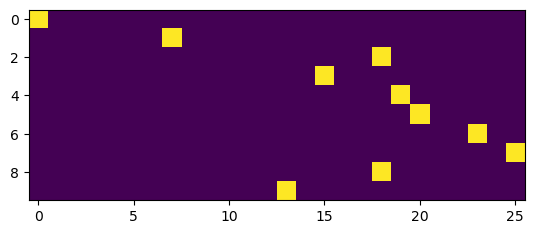

In [161]:
plt.imshow(xenc)

In [162]:
# Note : we want to input floating points into neural networks, not integers!
xenc.dtype

torch.float32

In [163]:
#randomly initialize 26 neurons' weights. Each neuron receives 26 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((26,26), generator=g, requires_grad = True)
# @ is matrix multiplication operator in pytorch
xenc @ W
# (10, 26) @ (26, 26)

# What does this all mean?
# Eg : (xenc @ w) [3, 13] is looking at the firing rate of the 13th neuron looking at the 3rd input.
# This is achieved by the dot product of the 3rd input and the 13th column of this W matrix.

tensor([[ 1.5674, -0.2373, -0.0274, -1.1008,  0.2859, -0.0296, -1.5471,  0.6049,
          0.0791,  0.9046, -0.4713,  0.7868, -0.3284, -0.4330,  1.3729,  2.9334,
          1.5618, -1.6261,  0.6772, -0.8404,  0.9849, -0.1484, -1.4795,  0.4483,
         -0.0707,  2.4968],
        [-1.2464,  0.6830, -0.3946,  0.0144,  0.5722,  0.8673,  0.6315, -1.2230,
         -0.2129,  0.5095,  0.3271,  1.9661, -0.2409, -0.7952,  0.2720, -1.1100,
         -0.4528, -0.4958,  1.2648,  1.4625,  1.1199,  0.9954, -1.2353,  0.7382,
          0.8142, -0.7381],
        [-2.1021, -0.2929, -0.7068,  0.9519, -1.1583, -1.2844,  1.0193,  1.6851,
          0.8342,  1.7113,  0.4446, -0.7186, -0.7034, -0.7133,  0.9976, -0.6198,
          1.9522,  0.1431,  0.1876,  0.7597, -0.2639, -0.7305,  0.6195,  0.0356,
         -0.0765, -1.2306],
        [-0.6311,  1.3431,  0.0380, -0.7165,  1.7206, -0.5215, -0.2325,  1.0774,
         -0.7602,  0.0090, -0.7922,  1.2307, -0.5276, -1.3207, -0.7065, -0.7786,
          1.2910, -1.5094

#### Goal : To create probability distribution within the neural network
#### We will use exponent e^x where negative numbers become numbers smaller than 1 and positive numbers become numbers bigger than 1
#### We can then interpret these log counts as the counts and hence the probability

In [164]:
logits = xenc @ W # log-counts
counts = logits.exp() # N equivalent, N was the probability array we had earlier
probs = counts / counts.sum(1, keepdims=True)
# The last 2 lines ^^^ together are called a 'softmax' , basically exponentiating logits and then normalizing them.
# Used for getting probability distributions as we are trying to do here.
probs


tensor([[0.0710, 0.0117, 0.0144, 0.0049, 0.0197, 0.0144, 0.0032, 0.0271, 0.0160,
         0.0366, 0.0092, 0.0325, 0.0107, 0.0096, 0.0585, 0.2784, 0.0706, 0.0029,
         0.0292, 0.0064, 0.0397, 0.0128, 0.0034, 0.0232, 0.0138, 0.1799],
        [0.0065, 0.0448, 0.0153, 0.0230, 0.0401, 0.0539, 0.0426, 0.0067, 0.0183,
         0.0377, 0.0314, 0.1618, 0.0178, 0.0102, 0.0297, 0.0075, 0.0144, 0.0138,
         0.0802, 0.0978, 0.0694, 0.0613, 0.0066, 0.0474, 0.0511, 0.0108],
        [0.0028, 0.0171, 0.0113, 0.0592, 0.0072, 0.0063, 0.0634, 0.1233, 0.0527,
         0.1266, 0.0357, 0.0111, 0.0113, 0.0112, 0.0620, 0.0123, 0.1611, 0.0264,
         0.0276, 0.0489, 0.0176, 0.0110, 0.0425, 0.0237, 0.0212, 0.0067],
        [0.0124, 0.0892, 0.0242, 0.0114, 0.1301, 0.0138, 0.0184, 0.0684, 0.0109,
         0.0235, 0.0105, 0.0797, 0.0137, 0.0062, 0.0115, 0.0107, 0.0846, 0.0051,
         0.0491, 0.0380, 0.0085, 0.0610, 0.1899, 0.0156, 0.0108, 0.0028],
        [0.1016, 0.0871, 0.0091, 0.0031, 0.0519, 0.0848,

In [165]:
probs[0].sum()

tensor(1., grad_fn=<SumBackward0>)

In [166]:
probs.shape
# This is the output, which is 26 numbers, 
# We interpret this as the neural net's assignment for how likely each one of the 26 characters are to come next
# We then tune W to change the probability, such that the loss function is minimized

torch.Size([10, 26])

In [167]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print('')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll
  print('')
print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------

bigram example 1: .f (indexes 0,7)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0710, 0.0117, 0.0144, 0.0049, 0.0197, 0.0144, 0.0032, 0.0271, 0.0160,
        0.0366, 0.0092, 0.0325, 0.0107, 0.0096, 0.0585, 0.2784, 0.0706, 0.0029,
        0.0292, 0.0064, 0.0397, 0.0128, 0.0034, 0.0232, 0.0138, 0.1799],
       grad_fn=<SelectBackward0>)
label (actual next character): 7
probability assigned by the net to the the correct character: 0.02713223546743393
log likelihood: -3.6070327758789062
negative log likelihood: 3.6070327758789062

--------

bigram example 2: fr (indexes 7,18)
input to the neural net: 7
output probabilities from the neural net: tensor([0.0065, 0.0448, 0.0153, 0.0230, 0.0401, 0.0539, 0.0426, 0.0067, 0.0183,
        0.0377, 0.0314, 0.1618, 0.0178, 0.0102, 0.0297, 0.0075, 0.0144, 0.0138,
        0.0802, 0.0978, 0.0694, 0.0613, 0.0066, 0.0474, 0.0511, 0.0108],
       grad_fn=<SelectBackward0>)
label (actual next character): 18
probabi

##### We need to extract these probabilities to find our loss: 
##### Finding loss is part of forward pass

In [168]:
# xs : tensor([ 0,  7, 18, 15, 19, 20, 23, 25, 18, 13])
# probs[0, 7] means after inputting the first one hot encoded char, (now a vector), 
# what is the likelyhood of getting the next CORRECT character which has an an stoi of 7.
probs[0, 7], probs[1, 18], probs[2, 15], probs[3, 19], probs[4, 20], probs[5, 23], probs[6, 25], probs[7, 18], probs[8, 13], probs[9, 0]

(tensor(0.0271, grad_fn=<SelectBackward0>),
 tensor(0.0802, grad_fn=<SelectBackward0>),
 tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0380, grad_fn=<SelectBackward0>),
 tensor(0.0171, grad_fn=<SelectBackward0>),
 tensor(0.0166, grad_fn=<SelectBackward0>),
 tensor(0.0071, grad_fn=<SelectBackward0>),
 tensor(0.0158, grad_fn=<SelectBackward0>),
 tensor(0.0112, grad_fn=<SelectBackward0>),
 tensor(0.0366, grad_fn=<SelectBackward0>))

In [169]:
# Using torch's arange function
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [170]:
probs[torch.arange(10), ys]

tensor([0.0271, 0.0802, 0.0123, 0.0380, 0.0171, 0.0166, 0.0071, 0.0158, 0.0112,
        0.0366], grad_fn=<IndexBackward0>)

In [171]:
#Finding the loss
loss = -probs[torch.arange(10), ys].log().mean()
loss

tensor(3.8864, grad_fn=<NegBackward0>)

In [172]:
# Backward pass # Same as micrograd
W.grad=None
loss.backward()
W.data += -0.1 * W.grad
# Note : parameters is the starting randomized numbers of W. gradient is what we calculate during backward pass, 
# to determine HOW each parameter affects the final output.
# Then add a small negative portion of the calculated grad to the parameter, to slightly nudge the loss closer to 0 (gradient descent)

## Putting it all together

In [173]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  5495


In [174]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  if k%10==0 : print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.893472194671631
2.4115097522735596
2.2158517837524414
2.1539273262023926
2.1267693042755127
2.112172842025757
2.103306531906128
2.0975136756896973
2.093545913696289
2.0907275676727295


In [187]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

venict.
thypshoipera yphinin.
sharwtolben.
erad.
volfipsthinalgul beca.


### Explanation of differences between Gradient descent method VS the Count of Tables approach.

logits = xenc @ W

xenc here is made out of one hot vectors, which is then multiplied by W matrix

lets say we have a 1 at the 5th dimension, and because of the way matrix multiplication works, it just ends up plucking out the 5th row of W.

Looking at the blue table earlier, we can see that we are doing the exact same thing except that W is the logcounts.
The blue table was filled in by COUNTING of bigrams, whereas in gradient base framework, we initialize it randomly and then we let the loss guide us to the exact same array.

So why go through the gradient descent method when its so troublesome? It's because it is more flexible and is SCALABLE. As we complexify our models, incorporating more than 1 previous characters, the table will no longer be able to hold so many different combinations, whereas the gradient descent method will be able to.

#### Regularization
Making W all zeroes is the same as adding a huge number to all counts in N, both of these are smoothing the distribution.

By making W all zeroes, exponent is all 1, and when normalized, all having equal probability.

By adding 0.01*(W**2).mean() to our loss, it is also trying to push W to zero.
